In [145]:
#import needed libraries
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from time import time
from sklearn.metrics import roc_auc_score, precision_score, recall_score, confusion_matrix
from imblearn.over_sampling import ADASYN
sns.set()
%matplotlib inline
import warnings
warning = [DeprecationWarning, FutureWarning, UserWarning]
for w in warning:
    warnings.filterwarnings("ignore", category=w)

In [23]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [24]:
#Let's look what is the size of the datasets 
print('Train Shape:', train.shape)
print('Test Shape:', test.shape)

Train Shape: (200000, 202)
Test Shape: (200000, 201)


In [25]:
pd.set_option('display.max_columns', None) #display all columns
pd.set_option('display.max_rows', None) #display all rows
train.head(10)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939,-13.6950,8.4068,35.4734,1.7093,15.1866,2.6227,7.3412,32.0888,13.9550,13.0858,6.6203,7.1051,5.3523,8.5426,3.6159,4.1569,3.0454,7.8522,-11.5100,7.5109,31.5899,9.5018,8.2736,10.1633,0.1225,12.5942,14.5697

In [26]:
# Total number of records
n_records = len(train)

# Number of records where the client made the transaction
made = train.target.sum()

# Number of records where the client didn't make the transaction
didnt_make = n_records - made

# Percentage of transaction made
percentage = made / n_records 

# Print the results
print("Total number of records: {}".format(n_records))
print("Clients that made the transaction: {}".format(made))
print("Clients that didn't make the transaction: {}".format(didnt_make))
print("Percentage of clients that made the transaction: {}%".format(percentage*100))

Total number of records: 200000
Clients that made the transaction: 20098
Clients that didn't make the transaction: 179902
Percentage of clients that made the transaction: 10.049%


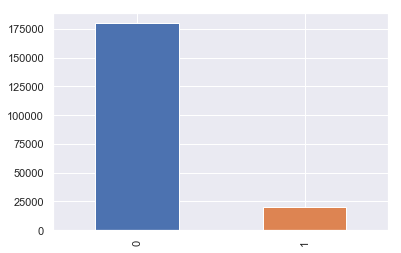

In [27]:
#Plot of distribution of 0 and 1 in the target
train.target.value_counts().plot.bar()

In [ ]:
describe_ones = train[train['target']==1].describe().T

In [ ]:
describe_zeros = train[train['target']==0].describe().T

In [28]:
train_data = train.copy()

In [86]:
y = train_data['target']
X = train_data.drop(['ID_code','target'], axis = 1)

# Preprocessing the data

In [30]:
from sklearn.decomposition import PCA

Fitting PCA 19/19 Wall time: 55 s


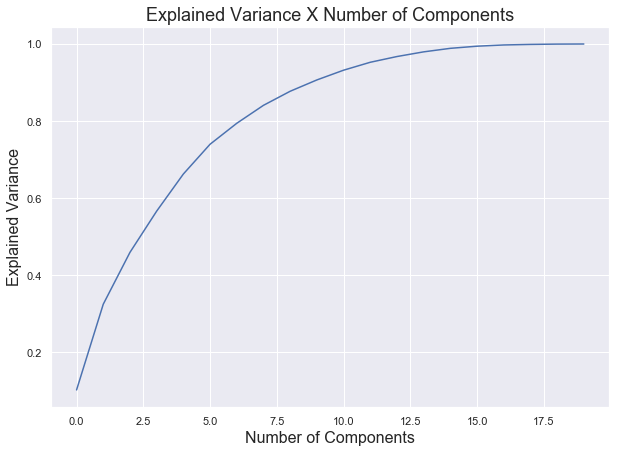

In [31]:
%%time
#Compute explained variance by n_components
variance = []
for i, n in enumerate(np.arange(2,len(X.columns), 10)):
    print("\rFitting PCA {}/19".format(i), end=" ")
    sys.stdout.flush()
    
    pca = PCA(n_components=n)
    pca.fit(X)
    variance.append(pca.explained_variance_ratio_.sum())
    
#Explained Variance Curve 
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(variance)
plt.title('Explained Variance X Number of Components', fontsize=18)
plt.ylabel('Explained Variance', fontsize=16)
plt.xlabel('Number of Components', fontsize=16)
plt.show

In [32]:
def pca_transform(data, pca_components):
    pca = PCA(n_components=pca_components, random_state=0)
    X = pca.fit_transform(data)
    return X

In [100]:
pca_components = 200
X_pca = pca_transform(X, pca_components)

# Baseline Model

In [34]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import RepeatedStratifiedKFold
from lightgbm import LGBMClassifier

In [152]:
def metrics(y_test, predictions, probabilities):
    cm = confusion_matrix(y_test, predictions)
    auc = round(roc_auc_score(y_test, probabilities), 4)
    fpr = round(100 * (cm[0][1]/(cm[0][0]+cm[0][1])))
    tpr = recall_score(y_test, predictions)
    ppv = precision_score(y_test, predictions)
    return cm, auc, fpr, tpr, ppv

In [36]:
#Setting up RepeatedStratifiedKFold
splits = 4
repeats = 2
iterations = splits * repeats
rskf = RepeatedStratifiedKFold(n_splits=splits, n_repeats=repeats, random_state=0)
sm = ADASYN(random_state=0, n_jobs = -1)

In [53]:
%%time
results = {}
count = 0
for train_index, test_index in rskf.split(X_pca, y):
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
    
    baseline_model = LogisticRegressionCV(cv = 2, penalty= 'l2', n_jobs=-1)
    baseline_model.fit(X_train_res, y_train_res)

    pred = baseline_model.predict(X_test)
    proba = baseline_model.predict_proba(X_test)[:,1]

    cm, auc, fpr, tpr, ppv = metrics(y_test, pred, proba)   
    results[count] = {"TN": cm[0][0],
                      "FP": cm[0][1],
                      "FN": cm[1][0],
                      "TP": cm[1][1],
                      "AUC": auc,
                      "FPR": fpr,
                      "TPR": tpr,
                      "PPV": ppv
                     }
    count += 1
    print("\rTraining. {}/{}".format(count,iterations), end=" ")
    sys.stdout.flush()

Training. 8/8 Wall time: 9min 38s


In [54]:
cols = ["TN", "FP", "FN","TP","FPR","TPR","PPV","AUC"]
df_results = pd.DataFrame(results).T[cols]
df_results

,TN,FP,FN,TP,FPR,TPR,PPV,AUC
0,30087.0,14889.0,1486.0,3539.0,33.0,70.0,19.0,0.7510
1,30297.0,14679.0,1575.0,3450.0,33.0,69.0,19.0,0.7446
2,30295.0,14680.0,1595.0,3429.0,33.0,68.0,19.0,0.7397
3,30283.0,14692.0,1549.0,3475.0,33.0,69.0,19.0,0.7472
4,30070.0,14906.0,1525.0,3500.0,33.0,70.0,19.0,0.7486
5,30236.0,14740.0,1591.0,3434.0,33.0,68.0,19.0,0.7445
6,30358.0,14617.0,1571.0,3453.0,33.0,69.0,19.0,0.7431
7,30319.0,14656.0,1551.0,3473.0,33.0,69.0,19.0,0.7453


In [55]:
df_results.describe()

,TN,FP,FN,TP,FPR,TPR,PPV,AUC
count,8.00000,8.0000,8.000000,8.000000,8.0,8.000000,8.0,8.000000
mean,30243.12500,14732.3750,1555.375000,3469.125000,33.0,69.000000,19.0,0.745500
std,107.26128,107.6382,36.378712,36.556952,0.0,0.755929,0.0,0.003464
min,30070.00000,14617.0000,1486.000000,3429.000000,33.0,68.000000,19.0,0.739700
25%,30198.75000,14673.2500,1543.000000,3446.000000,33.0,68.750000,19.0,0.744150
50%,30289.00000,14686.0000,1561.000000,3463.000000,33.0,69.000000,19.0,0.744950
75%,30302.50000,14777.2500,1579.000000,3481.250000,33.0,69.250000,19.0,0.747550
max,30358.00000,14906.0000,1595.000000,3539.000000,33.0,70.000000,19.0,0.751000


numpy.ndarray

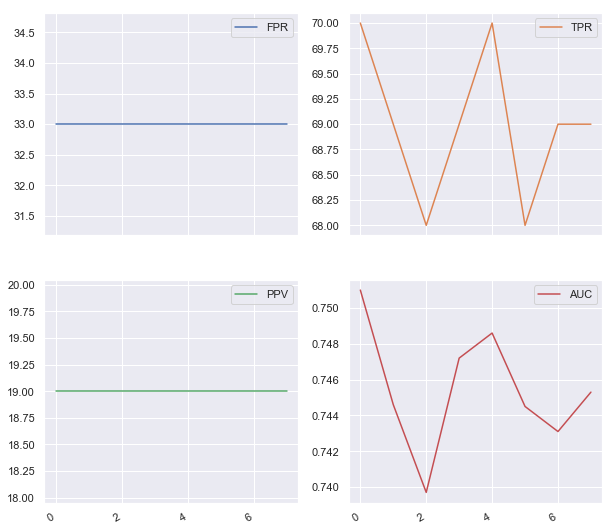

In [56]:
axes = df_results[["FPR","TPR","PPV","AUC"]].plot(subplots=True, layout=(2,2), figsize = (10,10))
type(axes)

In [57]:
print("Average AUC Result: %", round(df_results.AUC.mean(),4))
print("Average FPR Result: %", round(df_results.FPR.mean(),4))
print("Average TPR Result: %", round(df_results.TPR.mean(),4))
print("Average PPV Result: %", round(df_results.PPV.mean(),4))

Average AUC Result: % 0.7455
Average FPR Result: % 33.0
Average TPR Result: % 69.0
Average PPV Result: % 19.0


# XGBoost Model - Training and Testing

In [169]:
from sklearn.model_selection import train_test_split
X_t, Xcv, y_t, ycv = train_test_split(X, 
                                  y,
                                  test_size = 0.2,
                                  random_state=0)

In [170]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

def objective(space):
    # Instantiate the classifier
    clf = xgb.XGBClassifier(objective = "binary:logistic",                            
                            colsample_bytree=space['colsample_bytree'],
                            learning_rate = space['learning_rate'],
                            scale_pos_weight= space['scale_pos_weight'],
                            tree_method = 'gpu_hist', 
                            silent = 1,
                            max_depth = int(space['max_depth']),
                            min_child_weight = space['min_child_weight'],
                            subsample = space['subsample'],
                            gamma = space['gamma'])
    
    eval_set  = [( X_t, y_t), ( Xcv, ycv)]
    
    # Fit the classsifier
    clf.fit(X, y,
            eval_set=eval_set, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    
    # Predict on Cross Validation data
    pred = clf.predict(Xcv)
    
    # Calculate our Metric - accuracy
    auc = roc_auc_score(ycv, pred)

    # return needs to be in this below format. We use negative of accuracy since we want to maximize it.
    return {'loss': -auc, 'status': STATUS_OK }

In [171]:
space ={'max_depth': hp.quniform("x_max_depth", 2, 16, 1),
        'min_child_weight': hp.quniform ('x_min_child', 1, 10, 1),
        'learning_rate': hp.quniform ('x_learning_rate', 0.01, 0.2, 0.01),
        'subsample': hp.uniform ('x_subsample', 0.7, 1.),
        'gamma' : hp.quniform ('x_gamma', 1,10,1),
        'reg_alpha' : hp.quniform ('x_reg_alpha', 0.1,1.0,0.1),
        'colsample_bytree' : hp.quniform ('x_colsample_bytree', 0.01,.9,0.05),
        'scale_pos_weight' : hp.quniform('x_scale_pos_weight', 1,10,1)
    }

In [ ]:
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials)
print(best)

  4%|██                                                 | 2/50 [00:39<17:45, 22.20s/it, best loss: -0.9946990957280948]

In [75]:
#Transforming splits into XGBoost matrices
def get_xgb_matrix(X_train, y_train, X_test, y_test):
    D_train = xgb.DMatrix(X_train, label=y_train)
    D_test = xgb.DMatrix(X_test, label=y_test)
    return D_train, D_test

In [76]:
def model_training(dtrain, params, rounds):
    model = xgb.train(dtrain= dtrain, params= params, num_boost_round= rounds)
    return model

In [77]:
#make predictions based on probabilities and a threshold
def get_preds(probabilities, threshold):
    return np.array([1 if x > threshold else 0 for x in probabilities])

In [159]:
params = {'objective': "binary:logistic",
          'colsample_bytree': 0.3,
          'learning_rate': 0.1,
          'max_depth': 2,
          'gamma': 10,
          'subsample': 0.8,
          'reg_alpha' : 0.4,
          'scale_pos_weight': didnt_make/made,
          'tree_method': 'gpu_hist',
          'silent': 1
         }
#'x_min_child': 6.0,

In [160]:
%%time

results_xgb = {}
count = 0
for train_index, test_index in rskf.split(X_pca, y):
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
   
    #X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
    
    D_train, D_test = get_xgb_matrix(X_train, y_train, X_test, y_test)
    
    model = model_training(D_train, params, 2500)
    
    probas = model.predict(D_test)

    preds = get_preds(probas, 0.5)
   
    cm, auc, fpr, tpr, ppv = metrics(y_test, preds, probas)   
    results_xgb[count] = {"TN": cm[0][0],
                      "FP": cm[0][1],
                      "FN": cm[1][0],
                      "TP": cm[1][1],
                      "AUC": auc,
                      "FPR": fpr,
                      "TPR": tpr,
                      "PPV": ppv
                     }
    count += 1
    print("\rTraining. {}/{}".format(count,iterations), end=" ")
    sys.stdout.flush()

Training. 8/8        Wall time: 1min 51s


In [161]:
df_results_xgb = pd.DataFrame(results_xgb).T[cols]
df_results_xgb

,TN,FP,FN,TP,FPR,TPR,PPV,AUC
0,30553.0,5426.0,996.0,3025.0,15.0,0.752300,0.357946,0.8867
1,30646.0,5333.0,995.0,3026.0,15.0,0.752549,0.362005,0.8847
2,30761.0,5218.0,989.0,3032.0,15.0,0.754041,0.367515,0.8921
3,30688.0,5291.0,970.0,3051.0,15.0,0.758766,0.365740,0.8874
4,30607.0,5372.0,984.0,3037.0,15.0,0.755285,0.361161,0.8862
5,30614.0,5365.0,955.0,3066.0,15.0,0.762497,0.363658,0.8903
6,30752.0,5227.0,1005.0,3016.0,15.0,0.750062,0.365886,0.8862
7,30641.0,5338.0,1008.0,3013.0,15.0,0.749316,0.360795,0.8870


In [162]:
df_results_xgb.describe()

,TN,FP,FN,TP,FPR,TPR,PPV,AUC
count,8.000000,8.000000,8.000000,8.000000,8.0,8.000000,8.000000,8.000000
mean,30657.750000,5321.250000,987.750000,3033.250000,15.0,0.754352,0.363088,0.887575
std,72.051073,72.051073,17.854571,17.854571,0.0,0.004440,0.003193,0.002422
min,30553.000000,5218.000000,955.000000,3013.000000,15.0,0.749316,0.357946,0.884700
25%,30612.250000,5275.000000,980.500000,3022.750000,15.0,0.751741,0.361069,0.886200
50%,30643.500000,5335.500000,992.000000,3029.000000,15.0,0.753295,0.362831,0.886850
75%,30704.000000,5366.750000,998.250000,3040.500000,15.0,0.756155,0.365776,0.888125
max,30761.000000,5426.000000,1008.000000,3066.000000,15.0,0.762497,0.367515,0.892100


numpy.ndarray

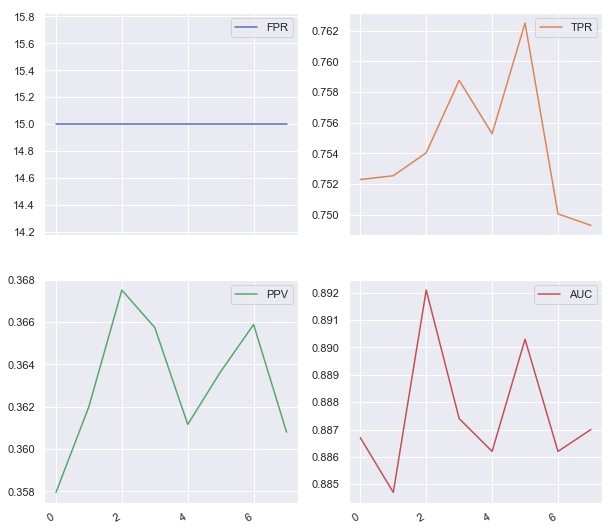

In [163]:
axes = df_results_xgb[["FPR","TPR","PPV","AUC"]].plot(subplots=True, layout=(2,2), figsize = (10,10))
type(axes)

In [164]:
print("Average AUC Result: %", round(df_results_xgb.AUC.mean(),4))
print("Average FPR Result: %", round(df_results_xgb.FPR.mean(),4))
print("Average TPR Result: %", round(df_results_xgb.TPR.mean(),4))
print("Average PPV Result: %", round(df_results_xgb.PPV.mean(),4))

Average AUC Result: % 0.8876
Average FPR Result: % 15.0
Average TPR Result: % 0.7544
Average PPV Result: % 0.3631


## ROC Curve

In [130]:
roc_values = []
for thresh in np.linspace(0, 1, 101):
    preds = get_preds(probas, thresh)
    tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
    tpr = tp/(tp+fn)
    fpr = fp/(fp+tn)
    roc_values.append([tpr, fpr])
tpr_values, fpr_values = zip(*roc_values)

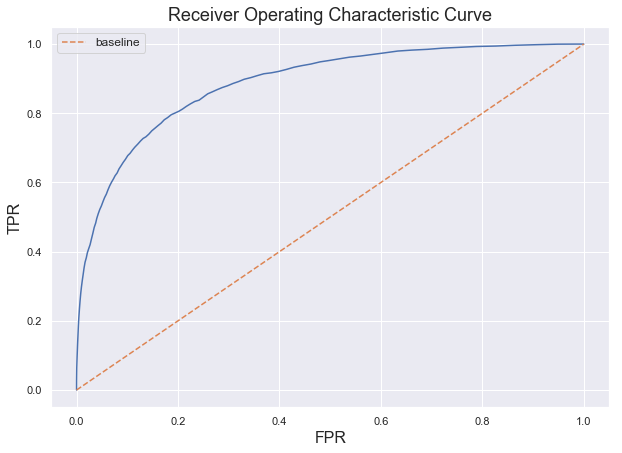

In [131]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(fpr_values, tpr_values)
ax.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
plt.title('Receiver Operating Characteristic Curve', fontsize=18)
plt.ylabel('TPR', fontsize=16)
plt.xlabel('FPR', fontsize=16)
plt.legend(fontsize=12);

# Submission

In [132]:
def transform_data(data):
    final_data = data.drop(['ID_code'], axis = 1)
    final_data = xgb.DMatrix(final_data)
    return final_data

In [133]:
def make_csv(test_data, model):
    preds_final = model.predict(test_data)
    predictions = pd.Series(preds_final, index = test['ID_code'], name = 'target')
    return predictions.to_csv("submission.csv", header = True)

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

D_train, D_test = get_xgb_matrix(X_train, y_train, X_test, y_test)

model = model_training(D_train, params, 2500)

In [135]:
test_data = transform_data(test)

In [136]:
make_csv(test_data, model)